In [1]:
import pandas as pd
from core.convert_data import class2numeric, norm
from core.math import mu
import numpy as np
from sklearn.model_selection import train_test_split
from models.near_neigbor import NearNeighbor
from models.bayes import NaiveBayes
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from models.LinearClassifier import LinearClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/mushrooms.csv")
data = class2numeric(data)

In [3]:
data['new'] = 1

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,new
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,1,1,2,1
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,6,7,0,2,0,0,8,5,6,1
8120,1,0,0,0,1,3,1,0,1,10,...,6,7,0,1,0,0,8,3,6,1
8121,1,3,0,0,1,3,1,0,1,1,...,6,7,0,2,0,0,8,5,6,1
8122,0,4,1,0,1,6,0,0,0,8,...,0,0,0,0,0,1,4,3,6,1


In [5]:
Y = data['class']
X = data.drop(['class'], axis=1)
X = norm(X)

In [6]:
Y = np.array(Y)
X = np.array(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [8]:
model = LinearClassifier(X_train, y_train)

In [9]:
model.margin(X_train[0], y_train[0])

-1.0719782170507024

In [10]:
(X_train[0] * model.weight).sum()

-0.07197821705070251

In [11]:
y_train[0]

1

In [12]:
margin  = []

In [13]:
margin  = []
for x, y in zip(X_train, y_train):
    margin.append(model.margin(x, y))

In [14]:
margin = np.sort(np.array(margin))

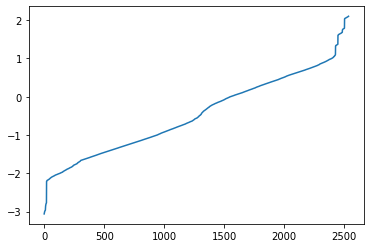

In [15]:
plt.plot(np.unique(np.round(margin, 3)))

In [23]:
a = lambda x: x ** 2 if x < 0 else 0

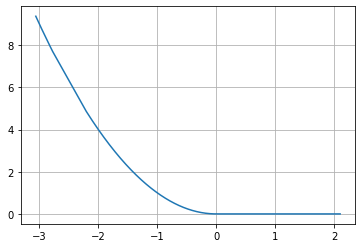

In [24]:
x = margin
y = np.array(list(map(a, margin)))
plt.grid()
plt.plot(x, y)